## Statistics refers to the mathematics and techniques with which we understand data. 

### Describing a single data set

In [1]:
# Consider the below ilst 
import random
random.seed(0)
num_list= [random.randint(n,100) for n in range(100)]
len(num_list)

100

### We can describe this data set by simply ploting a histogram plot

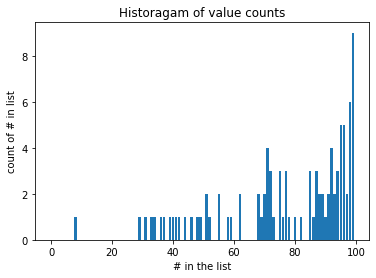

In [2]:
from collections import Counter
import matplotlib.pyplot as plt

num_counts = Counter(num_list)

xs = range(100) # produce a count upto 100
ys = [num_counts[x] for x in xs]  # Height is just the count of values

plt.bar(xs,ys)
plt.title("Historagam of value counts")
plt.xlabel("# in the list")
plt.ylabel("count of # in list")
plt.show()

### To describe this data in conversations we need statistics e.g. 
1. Number of data points

In [3]:
num_data_points = len(num_list)
print(f"The total number of data points are {len(num_list)}")

The total number of data points are 100


2. Largest and smallest values

In [4]:
largest_number = max(num_list)
smallest_number = min(num_list)
print(f"The largest number of the list is {largest_number}")
print(f"The smallest number of the list is {smallest_number}")

The largest number of the list is 100
The smallest number of the list is 8


3. We can look for numbers at specific positions

In [5]:
sorted_numbers = sorted(num_list)
print(f"The smallest number in the list is {sorted_numbers[0]}")
print(f"The 2nd smallest number in the list is {sorted_numbers[1]}")
print(f"The 11th largest number in the list is {sorted_numbers[-11]}")

The smallest number in the list is 8
The 2nd smallest number in the list is 29
The 11th largest number in the list is 99


## Central Tendencies

1. Mean(used most commonly) - which sum of all data divided by its count:

In [6]:
from typing import List
def num_mean(xs: List[float]) -> float:
    """
    ratio of sum of all data and count of data
    """
    return sum(xs)/len(xs)
assert(num_mean(num_list) == 77.44) ## mean always depends on the value of every point

## We’ll also sometimes be interested in the median

* It is the middle-most value (if the number of data points is odd) or 

* The average of the two middle-most values (if the number of data points is even).

### unlike the mean—the median doesn’t fully depend on every value in the data

In [7]:
## The underscore indicate that following are the private functions which is to be used by caculate mean function only'
def _odd_median(lis1 :List[float]) -> float:
    """
    returns middle element in sorted list
    """
    return sorted(lis1)[len(lis1)//2]
def _even_median(lis1 :List[float]) -> float:
    """
    returns the average of middle two element
    """
    mid_element = len(lis1)//2
    return ((sorted(lis1)[mid_element-1]+sorted(lis1)[mid_element])/2)
def num_median(v :List[float]) -> float:
    """
    Finds the middle most element of v
    """
    return _even_median(v) if len(v)%2 == 0 else _odd_median(v)

assert(num_median([12,63,44,34,56]) == 44)
assert(num_median([34,24,56,17,12,64]) == 29)

### The median of num_list can be computed using the above function

In [8]:
assert(num_median(num_list) == 85.5)

## Mean can some times be misleading specially in case too high or too low value is present n the list 

+ A generalization of the median is the quantile, which represents the value under which a certain percentile of the data lies (the median represents the value under which 50% of the data lies):

In [9]:
def quantile(lis: List[float], p :float) -> float:
    """
    Returns the pth percentile value of the list
    """
    p_index = int(p*len(lis))
    return sorted(lis)[p_index]

assert(quantile(num_list,0.10) == 42)
assert(quantile(num_list,0.25) == 68)
assert(quantile(num_list,0.75) == 96)
assert(quantile(num_list,0.90) == 99)

## Mode or Most common values

In [10]:
def mode(lis :List[float]) -> List[float]:
    """
    Returns a list since there might be more than one most occuring value
    """
    counts = Counter(lis)
    max_count = max(counts.values())
    return [x_i for x_i,count in counts.items()
           if count == max_count]
assert(set(mode(num_list)) == {99})

## Dispersion

### Dispersion refers to measures of how spread out our data is. Typically they’re statistics for which values near zero signify not spread out at all and for which large values (whatever that means) signify very spread out.

1. Range

In [11]:
def data_range(lis1 :List[float]) -> float:
    """
    The difference between maximum and minimum value
    """
    return max(lis1)-min(lis1)
assert(data_range(num_list) == 92)

+ The range is zero precisely when the max and min are equal, i.e. elements of x are all the same. 

+ Conversely, if the range is large, then the max is much larger than the min and the data is more spread out.

## Like the median, the range doesn’t really depend on the whole dataset. 

### A more complex measure dispersion is sum of Squares

In [29]:
 ## Importing sum_of_squares function from linear_algebra file
    
from ipynb.fs.full.linear_algebra import sum_of_squares # Note

def de_mean(lis1 :List[float]) -> List:
    """
    Reduces the mean of list to 0 by 
    substracting mean from every element
    """
    mean_lis1 = num_mean(lis1)
    return [lis1_n - mean_lis1 for lis1_n in lis1]

def variance(lis1 : List[float]) -> float:
    """ 
    Returns the average squared deviation from the mean
    """
    assert len(lis1) >=2 ,"Atleast 2 elements required to calculate variance"
    
    n = len(lis1)
    deviations = de_mean(lis1)
    return sum_of_squares(deviations)/(n-1)
assert(471 < variance(num_list) < 472)

#### it is almost the average squared deviation from the mean, except that we’re dividing by n - 1 instead of n. In fact, when we’re dealing with a sample from a larger population, x_bar is only an estimate of the actual mean, which means that on average (x_i - x_bar) ** 2 is an underestimate of x_i’s squared deviation from the mean, which is why we divide by n - 1 instead of n

### The unit of data and central tendencies like range, mean, mode are the same, but the variance has a squared unit. Hence, we calculate standard deviation

In [32]:
from math import sqrt

def standard_deviation(lis1 :List[float]) -> float:
    """
    Standard deviation is square root of variance
    """
    return sqrt(variance(lis1))

assert(21 < standard_deviation(num_list) < 22)

+ Both the range and standard deviation have the same outlier problem as that of mean.

## Interquartile range( IQR ) :-
#### A more robust alternative computes the difference between the 75th percentile value and the 25th percentile value. which is quite plainly unaffected by a small number of outliers.

In [34]:
def interquartile_range(lis1 :List[float]) -> float:
    """
    Returns the difference of 75 percentile and 25 percentile
    """
    return quantile(lis1,0.75) - quantile(lis1,0.25)

assert(interquartile_range(num_list) == 28)

## Covariance :- the paired analogue of variance. 

### Whereas variance measures how a single variable deviates from its mean, covariance measures how two variables vary in tandem from their means.

In [38]:
new_num_list = [random.randint(n,105) for n in range(5,105)]
len(new_num_list)

100

In [39]:
from ipynb.fs.full.linear_algebra import dot_product

def covariance(v :List[float],u :List[float]) -> float:
    assert(len(v) == len(u)),"Both the Vectors must have same length"
    
    return dot(de_mean(v)*de_mean(u))/(len(v)-1)

+ “large” positive covariance means that x tends to be large when y is large and small when y is small. 



+ A “large” negative covariance means that x tends to be small when y is large and vice versa.



+ A covariance close to zero means that no such relationship exists.